# Perkenalan

Dibuat oleh Arry Pandowo batch 01 student Hacktiv8 batch01 Full Stack Data Science 

# Library

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix, auc, roc_auc_score
from sklearn.metrics import f1_score, precision_recall_curve, classification_report, roc_curve
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import time

# Data Loading

In [92]:
df = pd.read_csv("weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

# Data Cleaning

In [94]:
nan = df.isna().sum()
nan

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [102]:
data_nan = (nan/145460 )*100

Evaporation dan Sunshine memiliki porsi NA yang besar dibandingkan dengan jumlah data, maka Evaporation, Sunshine, Cloud 9am dan Cloud 3pm diputuskan untuk di drop dari dataset

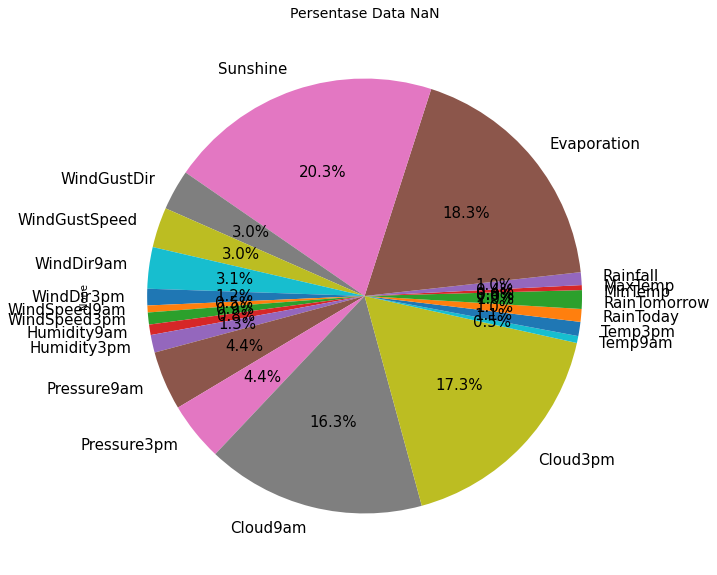

In [108]:
fig, ax = plt.subplots(figsize=(10,10))
data_nan.plot.pie(autopct="%.1f%%",  fontsize=15);
plt.title("Persentase Data NaN", fontsize=14);

## Drop NA

In [6]:
df.dropna(inplace=True)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No
142299,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No
142300,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No
142301,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No


In [7]:
df.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   WindGustDir    56420 non-null  object 
 6   WindGustSpeed  56420 non-null  float64
 7   WindDir9am     56420 non-null  object 
 8   WindDir3pm     56420 non-null  object 
 9   WindSpeed9am   56420 non-null  float64
 10  WindSpeed3pm   56420 non-null  float64
 11  Humidity9am    56420 non-null  float64
 12  Humidity3pm    56420 non-null  float64
 13  Pressure9am    56420 non-null  float64
 14  Pressure3pm    56420 non-null  float64
 15  Temp9am        56420 non-null  float64
 16  Temp3pm        56420 non-null  float64
 17  RainToday      56420 non-null  object 
 18  Ra

# Eksplorasi Data

In [9]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,WNW,31.0,WNW,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,WNW,35.0,NW,WNW,17.0,13.0,19.0,15.0,1010.7,1007.4,33.6,37.6,No,No


In [10]:
df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,13.464770,24.219206,2.130397,40.877366,15.667228,19.786778,65.874123,49.601985,1017.239505,1014.795580,18.204961,22.710333
std,6.416689,6.970676,7.014822,13.335232,8.317005,8.510180,18.513289,20.197040,6.909357,6.870892,6.567991,6.836543
min,-6.700000,4.100000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,-0.700000,3.700000
25%,8.600000,18.700000,0.000000,31.000000,9.000000,13.000000,55.000000,35.000000,1012.700000,1010.100000,13.100000,17.400000
50%,13.200000,23.900000,0.000000,39.000000,15.000000,19.000000,67.000000,50.000000,1017.200000,1014.700000,17.800000,22.400000
75%,18.400000,29.700000,0.600000,48.000000,20.000000,26.000000,79.000000,63.000000,1021.800000,1019.400000,23.300000,27.900000
max,31.400000,48.100000,206.200000,124.000000,67.000000,76.000000,100.000000,100.000000,1040.400000,1038.900000,39.400000,46.100000


# Data Preprocessing

## Korelasi

<AxesSubplot:>

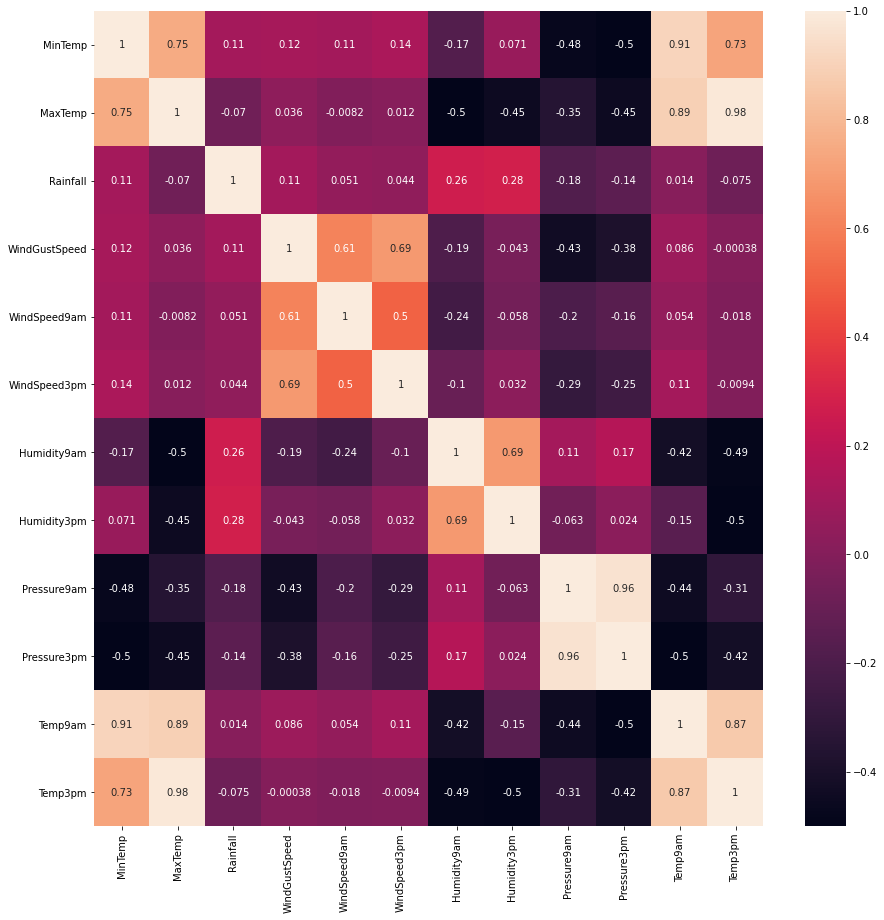

In [11]:
correlations = df.corr()
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(correlations, annot=True)

Temp9am, Pressure3pm, Pressure9am, Humidity3pm, Humidity9am, MaxTemp, MinTemp diremove karena memiliki korelasi tinggi

In [12]:
df.drop(['Temp9am', 'Pressure3pm', 'Pressure9am', 'Humidity3pm', 'Humidity9am', 'MaxTemp', 'MinTemp'], axis=1, inplace=True) 

<AxesSubplot:>

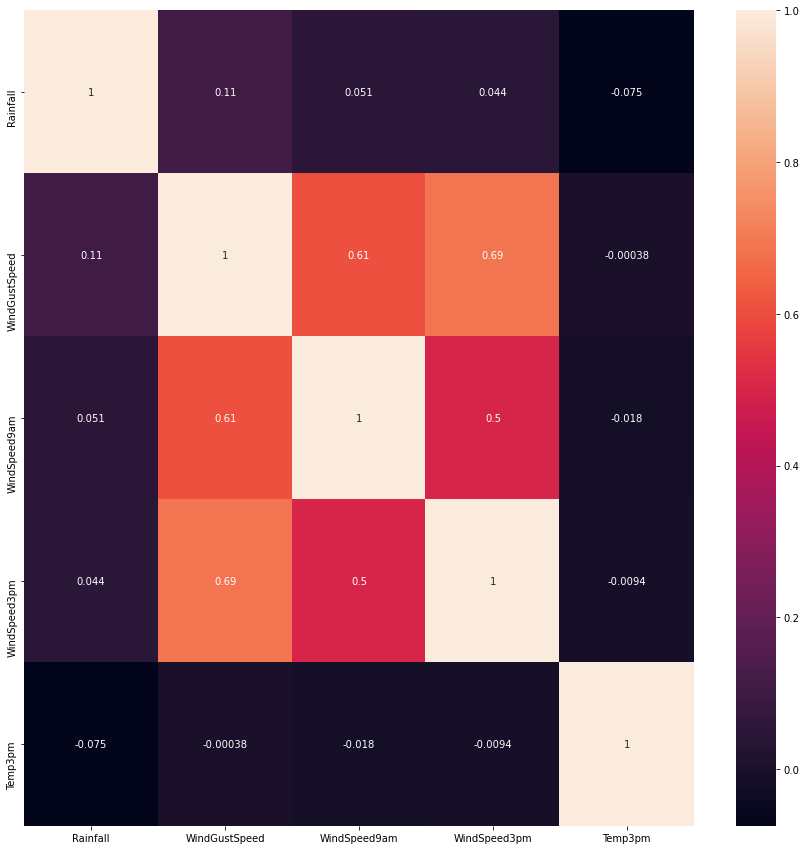

In [13]:
correlations = df.corr()
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(correlations, annot=True)

In [96]:
df.drop(['Location', 'Date'], axis=1, inplace=True) 

Mengeluarkan Location dan Date dari data yang akan diolah

## Encode All categorical to Numeric

### Location

In [33]:
df['Location'].unique()

array([ 4,  5, 11, 13, 19, 20, 22, 24,  3, 18,  9,  8, 10, 17, 23,  1,  2,
       21, 12, 14, 25, 16, 15,  7,  0,  6])

In [35]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Location'] = le.fit_transform(df['Location'])
df['Location'].unique()

array([ 4,  5, 11, 13, 19, 20, 22, 24,  3, 18,  9,  8, 10, 17, 23,  1,  2,
       21, 12, 14, 25, 16, 15,  7,  0,  6], dtype=int64)

### WindGustDir

In [57]:
df['WindGustDir'].unique()

array([11,  8,  5, 14,  3,  9,  1,  4,  0, 12, 13, 15,  6,  2, 10,  7],
      dtype=int64)

In [58]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
df['WindGustDir'].unique()

array([11,  8,  5, 14,  3,  9,  1,  4,  0, 12, 13, 15,  6,  2, 10,  7],
      dtype=int64)

### WindDir9am

In [38]:
df['WindDir9am'].unique()

array([ 1, 10,  5, 14,  7,  3,  8,  9,  4, 13, 11,  0,  6,  2, 15, 12])

In [39]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
df['WindDir9am'].unique()

array([ 1, 10,  5, 14,  7,  3,  8,  9,  4, 13, 11,  0,  6,  2, 15, 12],
      dtype=int64)

### WindDir3pm

In [40]:
df['WindDir3pm'].unique()

array([12, 10,  6, 15, 14,  8,  1,  3,  9,  5,  7,  0,  2,  4, 11, 13])

In [22]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])
df['WindDir3pm'].unique()

array([12, 10,  6, 15, 14,  8,  1,  3,  9,  5,  7,  0,  2,  4, 11, 13])

### RainToday

In [41]:
df['RainToday'].unique()

array([0, 1])

In [42]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainToday'].unique()

array([0, 1], dtype=int64)

### RainTomorrow

In [43]:
df['RainTomorrow'].unique()

array([0, 1])

In [44]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])
df['RainTomorrow'].unique()

array([0, 1], dtype=int64)

## Pendefinisian Target dan Predictor

In [59]:
df.dropna(axis=0, how='any', inplace=True)

X = df.drop(columns='RainTomorrow')
y = df['RainTomorrow']

* Target yang ditentukan adalah RainTommorow yang berarti besok akan terjadi hujan atau tidak
* 

## Pembagian Train-Test

In [60]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=8)

## Standard Scaller

In [61]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_trf = scaler.transform(X_train)

# Pendefinisian Model

## Logistic Regression

In [62]:
model_lr = LogisticRegression(solver="lbfgs", random_state=69)

## SVC Classification

In [63]:
model_svc = SVC(kernel='linear', random_state=69,C=1)

# Pelatihan Model

## Logistic Regression

### Waktu yang dibutuhkan untuk model_lr

In [64]:
%time model_lr.fit(X_train_trf, y_train)

Wall time: 42.9 ms


LogisticRegression(random_state=69)

In [65]:
X_val_trf = scaler.transform(X_val)

### Model Inference

In [66]:
%time y_val_predict = model_lr.predict(X_val_trf)
from sklearn.metrics import classification_report

print(classification_report(y_val, y_val_predict))

Wall time: 975 µs
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      8835
           1       0.63      0.27      0.38      2449

    accuracy                           0.81     11284
   macro avg       0.73      0.61      0.63     11284
weighted avg       0.78      0.81      0.78     11284



## SVC Classification

### Waktu yang dibutuhkan untuk model_svc

In [67]:
%time model_svc.fit(X_train_trf, y_train)

Wall time: 2min 15s


SVC(C=1, kernel='linear', random_state=69)

### Model inference

In [68]:
%time y_val_predict = model_svc.predict(X_val)
from sklearn.metrics import classification_report

print(classification_report(y_val, y_val_predict))

Wall time: 6.2 s
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      8835
           1       0.44      0.60      0.51      2449

    accuracy                           0.75     11284
   macro avg       0.66      0.69      0.67     11284
weighted avg       0.78      0.75      0.76     11284



# Evaluasi Model

## Logistic Regression

### Confusion matrix

In [69]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

cm = confusion_matrix(y_val, y_val_predict)

print(cm)
print(precision_score(y_val, y_val_predict))
print(recall_score(y_val, y_val_predict))

[[7001 1834]
 [ 989 1460]]
0.4432301153612629
0.5961616986525112


In [70]:
%time y_scores = cross_val_predict(model_lr, X_train, y_train, cv=3,method="decision_function")
y_scores

Wall time: 456 ms


array([ 0.836506  , -2.38618117, -1.1283161 , ..., -1.21524746,
        0.14763559, -1.35925056])

In [71]:
%time precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

Wall time: 7.75 ms


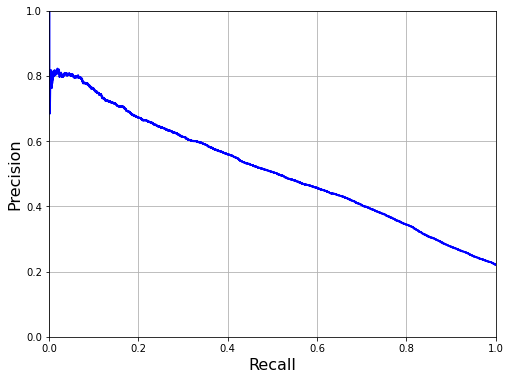

In [72]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

## Model Inference

In [73]:
%time y_val_predict = model_svc.predict(X_val)
from sklearn.metrics import classification_report

print(classification_report(y_val, y_val_predict))

Wall time: 6.1 s
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      8835
           1       0.44      0.60      0.51      2449

    accuracy                           0.75     11284
   macro avg       0.66      0.69      0.67     11284
weighted avg       0.78      0.75      0.76     11284



In [74]:
%time cm = confusion_matrix(y_val, y_val_predict)
print(cm)
print(precision_score(y_val, y_val_predict))
print(recall_score(y_val, y_val_predict))

Wall time: 7.81 ms
[[7001 1834]
 [ 989 1460]]
0.4432301153612629
0.5961616986525112


In [75]:
%time y_scores = cross_val_predict(model_svc, X_train, y_train, cv=3,method="decision_function")
y_scores

Wall time: 42min 30s


array([-0.58591636, -1.19632694, -0.9513817 , ..., -0.99836101,
       -0.77540688, -1.04878712])

In [79]:
%time precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

Wall time: 8.76 ms


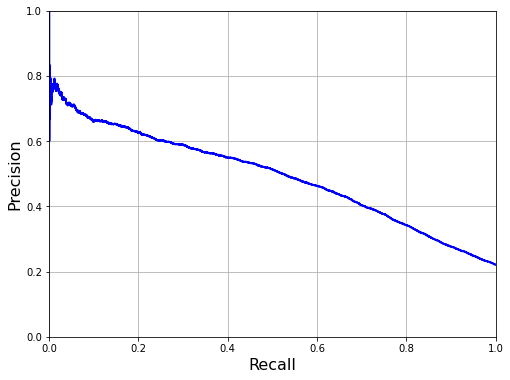

In [80]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

## Linear Reggression

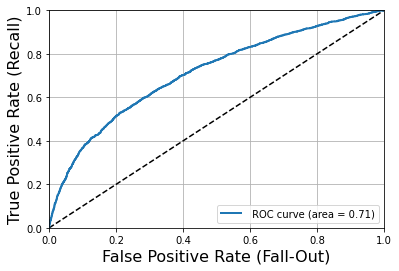

In [85]:
plt.axis([0, 1, 0, 1])                                    
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
plt.ylabel('True Positive Rate (Recall)', fontsize=16)   
plt.grid(True)                                            
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal

y_scores = model_lr.decision_function(X_val)
fpr, tpr, thresholds = roc_curve(y_val, y_scores)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, linewidth=2,label=' ROC curve (area = %0.2f)' % roc_auc)

plt.legend(loc="lower right")

## MAE & RMSE

In [90]:
model_pred_test = model_lr.predict(X_val)

MAE_test = mean_absolute_error(y_val, model_pred_test)
RMSE_test = np.sqrt(mean_squared_error(y_val, model_pred_test))

print('MAE Test : ', MAE_test)
print('RMSE Test : ', RMSE_test)
print("R2 score : %.2f" % r2_score(y_val, model_pred_test))

MAE Test :  0.7578872740163063
RMSE Test :  0.870567213956686
R2 score : -3.46


## ROC Curve (SVC)

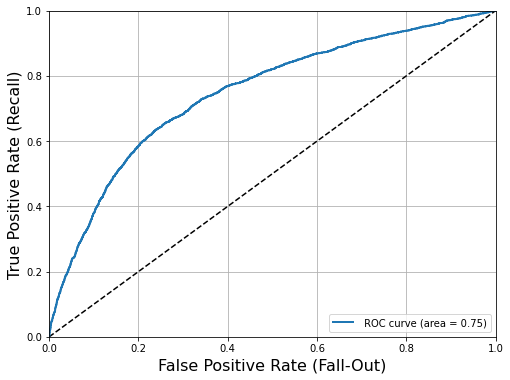

In [109]:
from sklearn.metrics import roc_curve,auc

plt.figure(figsize=(8, 6))                                   
plt.axis([0, 1, 0, 1])                                    
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
plt.ylabel('True Positive Rate (Recall)', fontsize=16)   
plt.grid(True)                                            
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal

y_scores = model_svc.decision_function(X_val)
fpr, tpr, thresholds = roc_curve(y_val, y_scores)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, linewidth=2,label=' ROC curve (area = %0.2f)' % roc_auc)

plt.legend(loc="lower right")

# Kesimpulan

The numbers: 

Logistic Regression
> Precission : 0.63 
            
> Recall : 0.27

> f1 Score : 0.38

> ROC Curve : 0.71


SVC 
> Precission : 0.44

>Recall : 0.60

>f1 Score : 0.51 

> ROC Curve :  0.75


* Keduanya memiliki precission score yang tergolong rendah, namun Logistic Regression memiliki skor yang sedikit lebih baik
* recall skor lebih baik dimiliki oleh SVC dengan margin yang cukup besar
* F1 skor juga sama sama rendah dengan skor sedikit lebih baik di svc
* ROC Curve dalam lingkup skor yang sama namun lebih baik dimiliki oleh SVC

Secara garis keduanya memiliki skor yang sama sama rendah, namun model Logistic Regression dipilih dikarenakan skor presisi yang lebih baik